In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# read in fire csv
fire_db = pd.read_csv('clean_fire.csv') 
print(len(fire_db))
fire_db.sort_values('incident_name').head()

398


incident_name           county  acres_burned   longitude   latitude  \
348     3-19 Fire        Mendocino          62.0 -123.013667  39.276000   
340      3-2 Fire  San Luis Obispo          20.0 -120.801074  35.519723   
344      4-8 Fire            Glenn         275.0 -122.501246  39.555943   
183       46 Fire        Riverside         328.0 -117.414111  33.985972   
257       58 Fire        Riverside          12.0 -115.965940  33.276650   

    incident_type date_extinguished date_created  
348      Wildfire         8/21/2020    8/18/2020  
340      Wildfire         8/17/2020    8/16/2020  
344      Wildfire         8/19/2020    8/17/2020  
183      Wildfire         11/3/2019   10/31/2019  
257      Wildfire         6/27/2020    6/24/2020

In [3]:
# the first goal is to create a new row for each county that experiences a fire, not just one row per fire.
#     this way, the danger scores can be applied per county per fire instead of just per fire.

# split "county" column on commas to break the counties apart
splitcounties_df = fire_db['county'].str.split(', ', expand=True)
splitcounties_df.columns =['county1', 'county2', 'county3', 'county4', 'county5', 'county6', 'county7']
splitcounties_df.head()

county1    county2 county3 county4 county5 county6 county7
0  San Diego       None    None    None    None    None    None
1     Amador  El Dorado    None    None    None    None    None
2       Napa     Solano    None    None    None    None    None
3       Napa     Sonoma    None    None    None    None    None
4       Napa     Sonoma    None    None    None    None    None

In [4]:
# add broken out counties back to dataframe to maintain relationship between counties and all other data in df
combinedfire_df = fire_db.join(splitcounties_df)
combinedfire_df.head()

incident_name             county  \
0                                          Pala Fire          San Diego   
1                                          Sand Fire  Amador, El Dorado   
2                  Atlas Fire (Southern LNU Complex)       Napa, Solano   
3                   Tubbs Fire (Central LNU Complex)       Napa, Sonoma   
4  Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...       Napa, Sonoma   

   acres_burned  longitude  latitude incident_type date_extinguished  \
0         122.0    1.00000   1.00000      Wildfire         5/25/2009   
1        4240.0 -120.78190  38.56910      Wildfire          8/2/2014   
2       51624.0 -122.24367  38.39206      Wildfire          2/9/2018   
3       36807.0 -122.62879  38.60895      Wildfire          2/9/2018   
4       56556.0 -122.52090  38.40410      Wildfire          2/9/2018   

  date_created    county1    county2 county3 county4 county5 county6 county7  
0    5/24/2009  San Diego       None    None    None    None    None    None  
1    7/25/2014     Amador  El Dorado    None    None    None    None    None  
2    10/8/2017       Napa     Solano    None    None    None    None    None  
3    10/8/2017       Napa     Sonoma    None    None    None    None    None  
4    10/8/2017       Napa     Sonoma    None    None    None    None    None

In [5]:
# create new dataframe to populate with new rows
col_names =  ['incident_name', 'county', 'acres_burned', 'longitude', 'latitude', 'incident_type', 'date_extinguished', 'date_created', 'county1', 'county2', 'county3', 'county4', 'county5', 'county6', 'county7']

newcountyrows_df  = pd.DataFrame(columns = col_names) 
 
newcountyrows_df

Empty DataFrame
Columns: [incident_name, county, acres_burned, longitude, latitude, incident_type, date_extinguished, date_created, county1, county2, county3, county4, county5, county6, county7]
Index: []

In [6]:
# loop through each row in the combinedfire_df dataframe to check for the counties broken out earlier in the code.
#     each time a broken-out county is encountered, create a new row with that county as the value for the 'county' column
#     instead of the list of counties that was there to start

i=0
for index, row in combinedfire_df.iterrows():
    if row[8] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county1']
        i=i+1
    if row[9] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county2']
        i=i+1
    if row[10] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county3']
        i=i+1
    if row[11] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county4']
        i=i+1
    if row[12] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county5']
        i=i+1
    if row[13] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county6']
        i=i+1
    if row[14] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county7']
        i=i+1
        
        
newcountyrows_df.sort_values('incident_name').head()

incident_name           county  acres_burned   longitude   latitude  \
377     3-19 Fire        Mendocino          62.0 -123.013667  39.276000   
358      3-2 Fire  San Luis Obispo          20.0 -120.801074  35.519723   
368      4-8 Fire            Glenn         275.0 -122.501246  39.555943   
199       46 Fire        Riverside         328.0 -117.414111  33.985972   
274       58 Fire        Riverside          12.0 -115.965940  33.276650   

    incident_type date_extinguished date_created          county1 county2  \
377      Wildfire         8/21/2020    8/18/2020        Mendocino    None   
358      Wildfire         8/17/2020    8/16/2020  San Luis Obispo    None   
368      Wildfire         8/19/2020    8/17/2020            Glenn    None   
199      Wildfire         11/3/2019   10/31/2019        Riverside    None   
274      Wildfire         6/27/2020    6/24/2020        Riverside    None   

    county3 county4 county5 county6 county7  
377    None    None    None    None    None  
358    None    None    None    None    None  
368    None    None    None    None    None  
199    None    None    None    None    None  
274    None    None    None    None    None

In [7]:
# as the counties for each fire now each have their own rows, county1-county7 can be dropped without consequence.
expanded_fires = newcountyrows_df.loc[:,'incident_name':'date_created']

#add a new column to the dataframe to store fire duration information.
expanded_fires['fire_duration_days']=""
expanded_fires.head()

incident_name     county  acres_burned  longitude  \
0                          Pala Fire  San Diego         122.0    1.00000   
1                          Sand Fire     Amador        4240.0 -120.78190   
2                          Sand Fire  El Dorado        4240.0 -120.78190   
3  Atlas Fire (Southern LNU Complex)       Napa       51624.0 -122.24367   
4  Atlas Fire (Southern LNU Complex)     Solano       51624.0 -122.24367   

   latitude incident_type date_extinguished date_created fire_duration_days  
0   1.00000      Wildfire         5/25/2009    5/24/2009                     
1  38.56910      Wildfire          8/2/2014    7/25/2014                     
2  38.56910      Wildfire          8/2/2014    7/25/2014                     
3  38.39206      Wildfire          2/9/2018    10/8/2017                     
4  38.39206      Wildfire          2/9/2018    10/8/2017

In [8]:
# convert the date strings to datetime

expanded_fires['date_extinguished'] = pd.to_datetime(expanded_fires['date_extinguished'], format='%m/%d/%Y')
expanded_fires['date_created'] = pd.to_datetime(expanded_fires['date_created'], format='%m/%d/%Y')
print(expanded_fires.dtypes)
expanded_fires.head()

incident_name                 object
county                        object
acres_burned                 float64
longitude                    float64
latitude                     float64
incident_type                 object
date_extinguished     datetime64[ns]
date_created          datetime64[ns]
fire_duration_days            object
dtype: object


incident_name     county  acres_burned  longitude  \
0                          Pala Fire  San Diego         122.0    1.00000   
1                          Sand Fire     Amador        4240.0 -120.78190   
2                          Sand Fire  El Dorado        4240.0 -120.78190   
3  Atlas Fire (Southern LNU Complex)       Napa       51624.0 -122.24367   
4  Atlas Fire (Southern LNU Complex)     Solano       51624.0 -122.24367   

   latitude incident_type date_extinguished date_created fire_duration_days  
0   1.00000      Wildfire        2009-05-25   2009-05-24                     
1  38.56910      Wildfire        2014-08-02   2014-07-25                     
2  38.56910      Wildfire        2014-08-02   2014-07-25                     
3  38.39206      Wildfire        2018-02-09   2017-10-08                     
4  38.39206      Wildfire        2018-02-09   2017-10-08

In [9]:
# loop through the dataframe to subtract each fire's start date from its end date to determine how many days the fire burned.
#     populate the result to the fire_duration_days column and convert the number to an integer so math can be performed
#     on it.
i=0
for index,row in expanded_fires.iterrows():
    start = expanded_fires.at[i,'date_created']
    end = expanded_fires.at[i,'date_extinguished']
    duration = end-start
    expanded_fires.at[i,'fire_duration_days'] = duration.days
    i=i+1

expanded_fires["fire_duration_days"] = expanded_fires["fire_duration_days"].astype(str).astype(int) 
  
print(expanded_fires.dtypes)
    
expanded_fires.sort_values('fire_duration_days')

incident_name                 object
county                        object
acres_burned                 float64
longitude                    float64
latitude                     float64
incident_type                 object
date_extinguished     datetime64[ns]
date_created          datetime64[ns]
fire_duration_days             int32
dtype: object


incident_name           county  acres_burned   longitude   latitude  \
168  Inghram Fire           Tehama          10.0 -122.160416  39.847708   
160      Elk Fire            Glenn          63.0 -123.437500  41.706111   
208     Wood Fire           Lassen          57.0 -120.493920  40.621550   
95   Preston Fire         Tuolumne          21.0 -120.420058  37.949747   
214    Byron Fire     Contra Costa          47.0 -121.595225  37.820660   
..            ...              ...           ...         ...        ...   
22     Horse Fire        Calaveras          80.0 -120.689020  37.957660   
21    Pawnee Fire             Lake       15185.0 -122.598480  39.067400   
20     Stoll Fire           Tehama         268.0 -122.275740  40.183950   
19     Creek Fire  San Luis Obispo          10.0 -120.392950  35.057470   
18     Grant Fire          Alameda         484.0 -121.579180  37.753750   

    incident_type date_extinguished date_created  fire_duration_days  
168      Wildfire        2019-10-08   2019-10-09                  -1  
160      Wildfire        2019-10-03   2019-10-04                  -1  
208      Wildfire        2020-02-23   2020-02-23                   0  
95       Wildfire        2019-08-08   2019-08-08                   0  
214      Wildfire        2020-04-27   2020-04-27                   0  
..            ...               ...          ...                 ...  
22       Wildfire        2019-01-04   2018-06-24                 194  
21       Wildfire        2019-01-04   2018-06-23                 195  
20       Wildfire        2019-01-04   2018-06-23                 195  
19       Wildfire        2019-01-04   2018-06-21                 197  
18       Wildfire        2019-01-04   2018-05-30                 219  

[435 rows x 9 columns]

In [10]:
# loop through the dataframe to create a measure for the average speed at which a fire spread in acres per day.
#     account for fire_duration_days values of 1 or 0 by setting their value to 1 so it won't cause math problems later.
expanded_fires['fire_speed']=""
i=0
for index,row in expanded_fires.iterrows():
    span = expanded_fires.at[i,'acres_burned']
    days = expanded_fires.at[i,'fire_duration_days']
    if days < 2:
        speed = 1
    else:
        speed = round(span/days)
    expanded_fires.at[i,'fire_speed'] = speed
    i=i+1

expanded_fires.sort_values('fire_speed', ascending=False).head(50)

incident_name         county  \
365                 August Complex (includes Doe Fire)           Lake   
363                 August Complex (includes Doe Fire)         Tehama   
361                 August Complex (includes Doe Fire)       Humboldt   
364                 August Complex (includes Doe Fire)          Glenn   
362                 August Complex (includes Doe Fire)        Trinity   
366                 August Complex (includes Doe Fire)         Colusa   
360                 August Complex (includes Doe Fire)      Mendocino   
50                                           Camp Fire          Butte   
376                              SCU Lightning Complex     Stanislaus   
374                              SCU Lightning Complex   Contra Costa   
373                              SCU Lightning Complex        Alameda   
372                              SCU Lightning Complex    Santa Clara   
375                              SCU Lightning Complex    San Joaquin   
383  LNU Lightning Complex (includes Hennessey, Gam...         Solano   
382  LNU Lightning Complex (includes Hennessey, Gam...           Yolo   
381  LNU Lightning Complex (includes Hennessey, Gam...           Lake   
380  LNU Lightning Complex (includes Hennessey, Gam...         Sonoma   
379  LNU Lightning Complex (includes Hennessey, Gam...           Napa   
13                                         Thomas Fire        Ventura   
12                                         Thomas Fire  Santa Barbara   
33                                           Carr Fire         Shasta   
34                                           Carr Fire        Trinity   
184                                       Kincade Fire         Sonoma   
356                                      Loyalton Fire         Sierra   
409                                          Zogg Fire         Shasta   
410                                          Zogg Fire         Tehama   
319                                       July Complex          Modoc   
318                                       July Complex       Siskiyou   
408                                         Glass Fire         Sonoma   
407                                         Glass Fire           Napa   
40                      Ranch Fire (Mendocino Complex)      Mendocino   
38                      Ranch Fire (Mendocino Complex)          Glenn   
39                      Ranch Fire (Mendocino Complex)           Lake   
37                      Ranch Fire (Mendocino Complex)         Colusa   
370   CZU Lightning Complex (Including Warnella Fire)      Santa Cruz   
371   CZU Lightning Complex (Including Warnella Fire)       San Mateo   
302                                       Mineral Fire         Fresno   
53                                        Woolsey Fire        Ventura   
52                                        Woolsey Fire    Los Angeles   
201                                        Maria Fire         Ventura   
390                                        Sheep Fire          Plumas   
284                                          Bena Fire           Kern   
425                                   Blue Ridge Fire          Orange   
130                                      Red Bank Fire         Tehama   
424                                    Silverado Fire          Orange   
81                                         Tucker Fire          Modoc   
247                                         Grant Fire     Sacramento   
311                                          Gold Fire         Lassen   
398                                        Valley Fire      San Diego   
337                                         North Fire         Lassen   

     acres_burned   longitude   latitude incident_type date_extinguished  \
365     1032648.0 -122.673000  39.776000      Wildfire        2020-11-11   
363     1032648.0 -122.673000  39.776000      Wildfire        2020-11-11   
361     1032648.0 -122.673000  39.776000      Wildfire        2020-11-11   
364     10326

In [11]:
plt.boxplot(expanded_fires['acres_burned'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2991f540ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f5573a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f540940>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f557a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f557d60>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x2991f5e56a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f5e5fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f5e57f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f5f06a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f5f09a0>],
 'means': []}

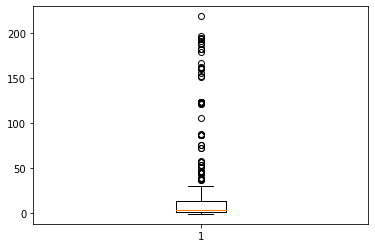

In [12]:
plt.boxplot(expanded_fires['fire_duration_days'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2991f638d00>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f6453d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f638970>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f645a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f645d90>],
 'means': []}

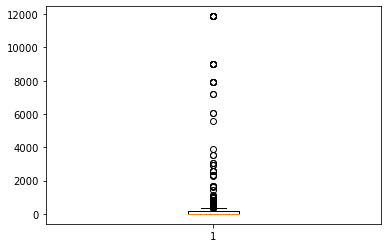

In [13]:
plt.boxplot(expanded_fires['fire_speed'])

In [14]:
# because this dataset contains extreme outliers as visualized above, outliers will need to be excluded from the dataset
#     in order to create meaningful danger categories
q1ab = np.percentile(expanded_fires.acres_burned, 25) 
medab = np.percentile(expanded_fires.acres_burned, 50)
q3ab = np.percentile(expanded_fires.acres_burned, 75)

q1fdd = np.percentile(expanded_fires.fire_duration_days, 25) 
medfdd = np.percentile(expanded_fires.fire_duration_days, 50)
q3fdd = np.percentile(expanded_fires.fire_duration_days, 75)

q1fs = np.percentile(expanded_fires.fire_speed, 25) 
medfs = np.percentile(expanded_fires.fire_speed, 50)
q3fs = np.percentile(expanded_fires.fire_speed, 75)

print(f'Q1 acres burned: {q1ab}')
print(f'Median acres burned: {medab}')
print(f'Q3 acres burned: {q3ab}')
print("=====")

print(f'Q1 duration: {q1fdd}')
print(f'Median duration: {medfdd}')
print(f'Q3 duration: {q3fdd}')
print("=====")

print(f'Q1 speed: {q1fs}')
print(f'Median speed: {medfs}')
print(f'Q3 speed: {q3fs}')


Q1 acres burned: 50.0
Median acres burned: 178.0
Q3 acres burned: 1383.0
=====
Q1 duration: 1.0
Median duration: 3.0
Q3 duration: 13.0
=====
Q1 speed: 1.0
Median speed: 12.0
Q3 speed: 151.5


In [15]:
# create dataframe where each there is only one row per fire again
unexpanded_fires = expanded_fires.drop_duplicates(['incident_name', 'acres_burned'])
unexpanded_fires.sort_values('incident_name')

incident_name           county  acres_burned   longitude   latitude  \
377      3-19 Fire        Mendocino          62.0 -123.013667  39.276000   
358       3-2 Fire  San Luis Obispo          20.0 -120.801074  35.519723   
368       4-8 Fire            Glenn         275.0 -122.501246  39.555943   
199        46 Fire        Riverside         328.0 -117.414111  33.985972   
274        58 Fire        Riverside          12.0 -115.965940  33.276650   
..             ...              ...           ...         ...        ...   
208      Wood Fire           Lassen          57.0 -120.493920  40.621550   
391  Woodward Fire            Marin        4929.0 -122.836701  38.018089   
52    Woolsey Fire      Los Angeles       96949.0 -118.701280  34.235000   
111     Yucca Fire        Riverside          34.0 -116.857817  33.450600   
409      Zogg Fire           Shasta       56338.0 -122.566560  40.539270   

    incident_type date_extinguished date_created  fire_duration_days  \
377      Wildfire        2020-08-21   2020-08-18                   3   
358      Wildfire        2020-08-17   2020-08-16                   1   
368      Wildfire        2020-08-19   2020-08-17                   2   
199      Wildfire        2019-11-03   2019-10-31                   3   
274      Wildfire        2020-06-27   2020-06-24                   3   
..            ...               ...          ...                 ...   
208      Wildfire        2020-02-23   2020-02-23                   0   
391      Wildfire        2020-10-02   2020-08-18                  45   
52       Wildfire        2019-01-04   2018-11-08                  57   
111      Wildfire        2019-08-23   2019-08-22                   1   
409      Wildfire        2020-10-13   2020-09-27                  16   

    fire_speed  
377         21  
358          1  
368        138  
199        109  
274          4  
..         ...  
208          1  
391        110  
52        1701  
111          1  
409       3521  

[398 rows x 10 columns]

In [16]:
# create new dataframes excluding outliers and visualize the data
acres_iqr = unexpanded_fires.drop(unexpanded_fires["acres_burned"].loc[unexpanded_fires["acres_burned"]>q3ab].index)
acres_iqr = acres_iqr.drop(acres_iqr["acres_burned"].loc[acres_iqr["acres_burned"]<q1ab].index)
print(len(acres_iqr))
plt.boxplot(acres_iqr["acres_burned"])

216


{'whiskers': [<matplotlib.lines.Line2D at 0x2991f69ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f6aa4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f69da90>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f6aabb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f6aaeb0>],
 'means': []}

242


{'whiskers': [<matplotlib.lines.Line2D at 0x2991f6f9c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f704370>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f6f9910>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f704a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f704d30>],
 'means': []}

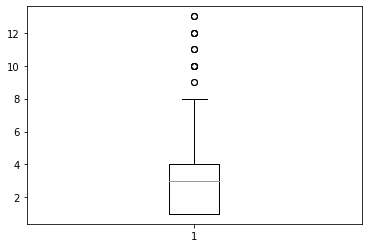

In [17]:
duration_iqr = unexpanded_fires.drop(unexpanded_fires["fire_duration_days"].loc[unexpanded_fires["fire_duration_days"]>q3fdd].index)
duration_iqr = duration_iqr.drop(duration_iqr["fire_duration_days"].loc[duration_iqr["fire_duration_days"]<q1fdd].index)
print(len(duration_iqr))
plt.boxplot(duration_iqr["fire_duration_days"])

316


{'whiskers': [<matplotlib.lines.Line2D at 0x2991f756370>,
 'caps': [<matplotlib.lines.Line2D at 0x2991f756a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991f749fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2991f75f160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2991f75f460>],
 'means': []}

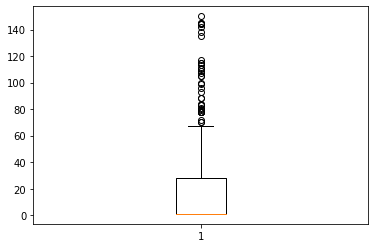

In [18]:
speed_iqr = unexpanded_fires.drop(unexpanded_fires["fire_speed"].loc[unexpanded_fires["fire_speed"]>q3fs].index)
speed_iqr = speed_iqr.drop(speed_iqr["fire_speed"].loc[speed_iqr["fire_speed"]<q1fs].index)
print(len(speed_iqr))
plt.boxplot(speed_iqr["fire_speed"])

In [19]:
# visualizations show that, as expected, even with outliers removed,
#     the vast majority of fires skew towards fewer acres burned, a short duration, and slower speeds.

In [20]:
# set the danger categories for each fire, 
# then, create a formula where acres burned x duration x speed / 3 = danger score for each county 
#     and create a dataframe attaching a danger score to each fire incident

lowestdanger_ab = float(np.percentile(unexpanded_fires.acres_burned, 20))
lowdanger_ab = float(np.percentile(unexpanded_fires.acres_burned, 40))
meddanger_ab = float(np.percentile(unexpanded_fires.acres_burned, 60))
highdanger_ab = float(np.percentile(unexpanded_fires.acres_burned, 80))
highestdanger_ab = float(np.percentile(unexpanded_fires.acres_burned, 100))

lowestdanger_fdd = float(np.percentile(unexpanded_fires.fire_duration_days, 20))
lowdanger_fdd = float(np.percentile(unexpanded_fires.fire_duration_days, 40))
meddanger_fdd = float(np.percentile(unexpanded_fires.fire_duration_days, 60))
highdanger_fdd = float(np.percentile(unexpanded_fires.fire_duration_days, 80))
highestdanger_fdd = float(np.percentile(unexpanded_fires.fire_duration_days, 100))

lowestdanger_fs = float(np.percentile(unexpanded_fires.fire_speed, 20))
lowdanger_fs = float(np.percentile(unexpanded_fires.fire_speed, 40))
meddanger_fs = float(np.percentile(unexpanded_fires.fire_speed, 60))
highdanger_fs = float(np.percentile(unexpanded_fires.fire_speed, 80))
highestdanger_fs = float(np.percentile(unexpanded_fires.fire_speed, 100))

i=0
for index, row in unexpanded_fires.iterrows():
    if row['acres_burned'] < lowestdanger_ab:
        abscore=20
        unexpanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > lowestdanger_ab and row['acres_burned'] < lowdanger_ab:
        abscore =40
        unexpanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > lowdanger_ab and row['acres_burned'] < meddanger_ab:
        abscore =60
        unexpanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > meddanger_ab and row['acres_burned'] < highdanger_ab:
        abscore =80
        unexpanded_fires.at[i,'abscore'] = abscore
        i=i+1
    else:
        abscore =100
        unexpanded_fires.at[i,'abscore'] = abscore
        i=i+1
    
i=0
for index, row in unexpanded_fires.iterrows():
    if row['fire_duration_days'] < lowestdanger_fdd:
        fddscore=20
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] == lowestdanger_fdd:
        fddscore=20
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > lowestdanger_fdd and row['fire_duration_days'] < lowdanger_fdd:
        fddscore =40
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > lowdanger_fdd and row['fire_duration_days'] < meddanger_fdd:
        fddscore =60
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > meddanger_fdd and row['fire_duration_days'] < highdanger_fdd:
        fddscore =80
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    else:
        fddscore =100
        unexpanded_fires.at[i,'fddscore'] = fddscore
        i=i+1

i=0
for index, row in unexpanded_fires.iterrows():
    if row['fire_speed'] < lowestdanger_fs:
        fsscore=20
        unexpanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > lowestdanger_fs and row['fire_speed'] < lowdanger_fs:
        fsscore =40
        unexpanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > lowdanger_fs and row['fire_speed'] < meddanger_fs:
        fsscore =60
        unexpanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > meddanger_fs and row['fire_speed'] < highdanger_fs:
        fsscore =80
        unexpanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    else:
        fsscore =100
        unexpanded_fires.at[i,'fsscore'] = fsscore
        i=i+1

initial_scores = unexpanded_fires[['incident_name', 'abscore', 'fddscore', 'fsscore']]
initial_scores

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

incident_name  abscore  fddscore  \
0                                            Pala Fire     60.0     100.0   
1                                            Sand Fire    100.0      80.0   
3                    Atlas Fire (Southern LNU Complex)    100.0     100.0   
5                     Tubbs Fire (Central LNU Complex)    100.0     100.0   
7    Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...     80.0     100.0   
..                                                 ...      ...       ...   
383                                                NaN     20.0     100.0   
385                                                NaN     40.0      60.0   
397                                                NaN     40.0     100.0   
408                                                NaN      NaN     100.0   
410                                                NaN      NaN     100.0   

     fsscore  
0      100.0  
1      100.0  
3      100.0  
5       80.0  
7       60.0  
..       ...  
383     60.0  
385     80.0  
397     60.0  
408    100.0  
410    100.0  

[435 rows x 4 columns]

In [21]:
# continued from previous block
i=0
for index, row in unexpanded_fires.iterrows():
    initial_scores.at[i,'fire_danger_score']= (row['abscore'] + row['fddscore']+row['fsscore'])/3
    i = i+1

danger_df = initial_scores[['fire_danger_score']]
danger_df

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


fire_danger_score
0            86.666667
1            93.333333
3            93.333333
5            73.333333
7            66.666667
..                 ...
383                NaN
385                NaN
397                NaN
408          80.000000
410          93.333333

[435 rows x 1 columns]

In [22]:
# create a table that assigns the danger value to the fire incident and each county in which the fire took place
final_fire_df= expanded_fires.join(danger_df)
final_fire_df= final_fire_df[['incident_name','county','fire_danger_score']]
final_fire_df.head(60)

incident_name           county  \
0                                           Pala Fire        San Diego   
1                                           Sand Fire           Amador   
2                                           Sand Fire        El Dorado   
3                   Atlas Fire (Southern LNU Complex)             Napa   
4                   Atlas Fire (Southern LNU Complex)           Solano   
5                    Tubbs Fire (Central LNU Complex)             Napa   
6                    Tubbs Fire (Central LNU Complex)           Sonoma   
7   Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...             Napa   
8   Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...           Sonoma   
9                         Cascade Fire (Wind Complex)             Yuba   
10       Redwood Valley Fire (Mendocino Lake Complex)        Mendocino   
11                           Lobo Fire (Wind Complex)           Nevada   
12                                        Thomas Fire    Santa Barbara   
13                                        Thomas Fire          Ventura   
14                                          Drum Fire    Santa Barbara   
15                                         Coast Fire    Santa Barbara   
16                                   Riverbottom Fire        Riverside   
17                                       Holiday Fire        El Dorado   
18                                         Grant Fire          Alameda   
19                                         Creek Fire  San Luis Obispo   
20                                         Stoll Fire           Tehama   
21                                        Pawnee Fire             Lake   
22                                         Horse Fire        Calaveras   
23                                       Waverly Fire      San Joaquin   
24                                         Hyatt Fire           Lassen   
25                                        County Fire             Napa   
26                                        County Fire             Yolo   
27                                          West Fire        San Diego   
28                                     Klamathon Fire         Siskiyou   
29                                         Irish Fire           Amador   
30                                       Holiday Fire    Santa Barbara   
31                                      Spring 2 Fire             Lake   
32                                        Carder Fire             Lake   
33                                          Carr Fire           Shasta   
34                                          Carr Fire          Trinity   
35                                         Marsh Fire     Contra Costa   
36                                        Wagner Fire         Mariposa   
37                     Ranch Fire (Mendocino Complex)           Colusa   
38                     Ranch Fire (Mendocino Complex)            Glenn   
39                     Ranch Fire (Mendocino Complex)             Lake   
40                     Ranch Fire (Mendocino Complex)        Mendocino   
41                     River Fire (Mendocino Complex)           Colusa   
42                     River Fire (Mendocino Complex)             Lake   
43                     River Fire (Mendocino Complex)        Mendocino   
44                                        Steele Fire             Napa   
45                                         Omega Fire        El Dorado   
46                                          Holy Fire           Orange   
47                                         Delta Fire           Shasta   
48                                         Delta Fire          Trinity   
49                                        Meyers Fire        El Dorado   
50                                          Camp Fire            Butte   
51                                          Hill Fire          Ventura   
52                                       Woolsey Fire      Los Angeles   
53                                       Woo

In [23]:
final_fire_df.to_csv('fire_danger_csv', index=False)
final = pd.read_csv('fire_danger_csv') 
final.head()

incident_name     county  fire_danger_score
0                          Pala Fire  San Diego          86.666667
1                          Sand Fire     Amador          93.333333
2                          Sand Fire  El Dorado         100.000000
3  Atlas Fire (Southern LNU Complex)       Napa          93.333333
4  Atlas Fire (Southern LNU Complex)     Solano          80.000000